# Injectable Estrogens

*analyzing steady-state behavior of different estradiol esthers*

In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.misc import derivative

%matplotlib inline
from matplotlib import pyplot as plt

import injectio
import injectables

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Injection Curves

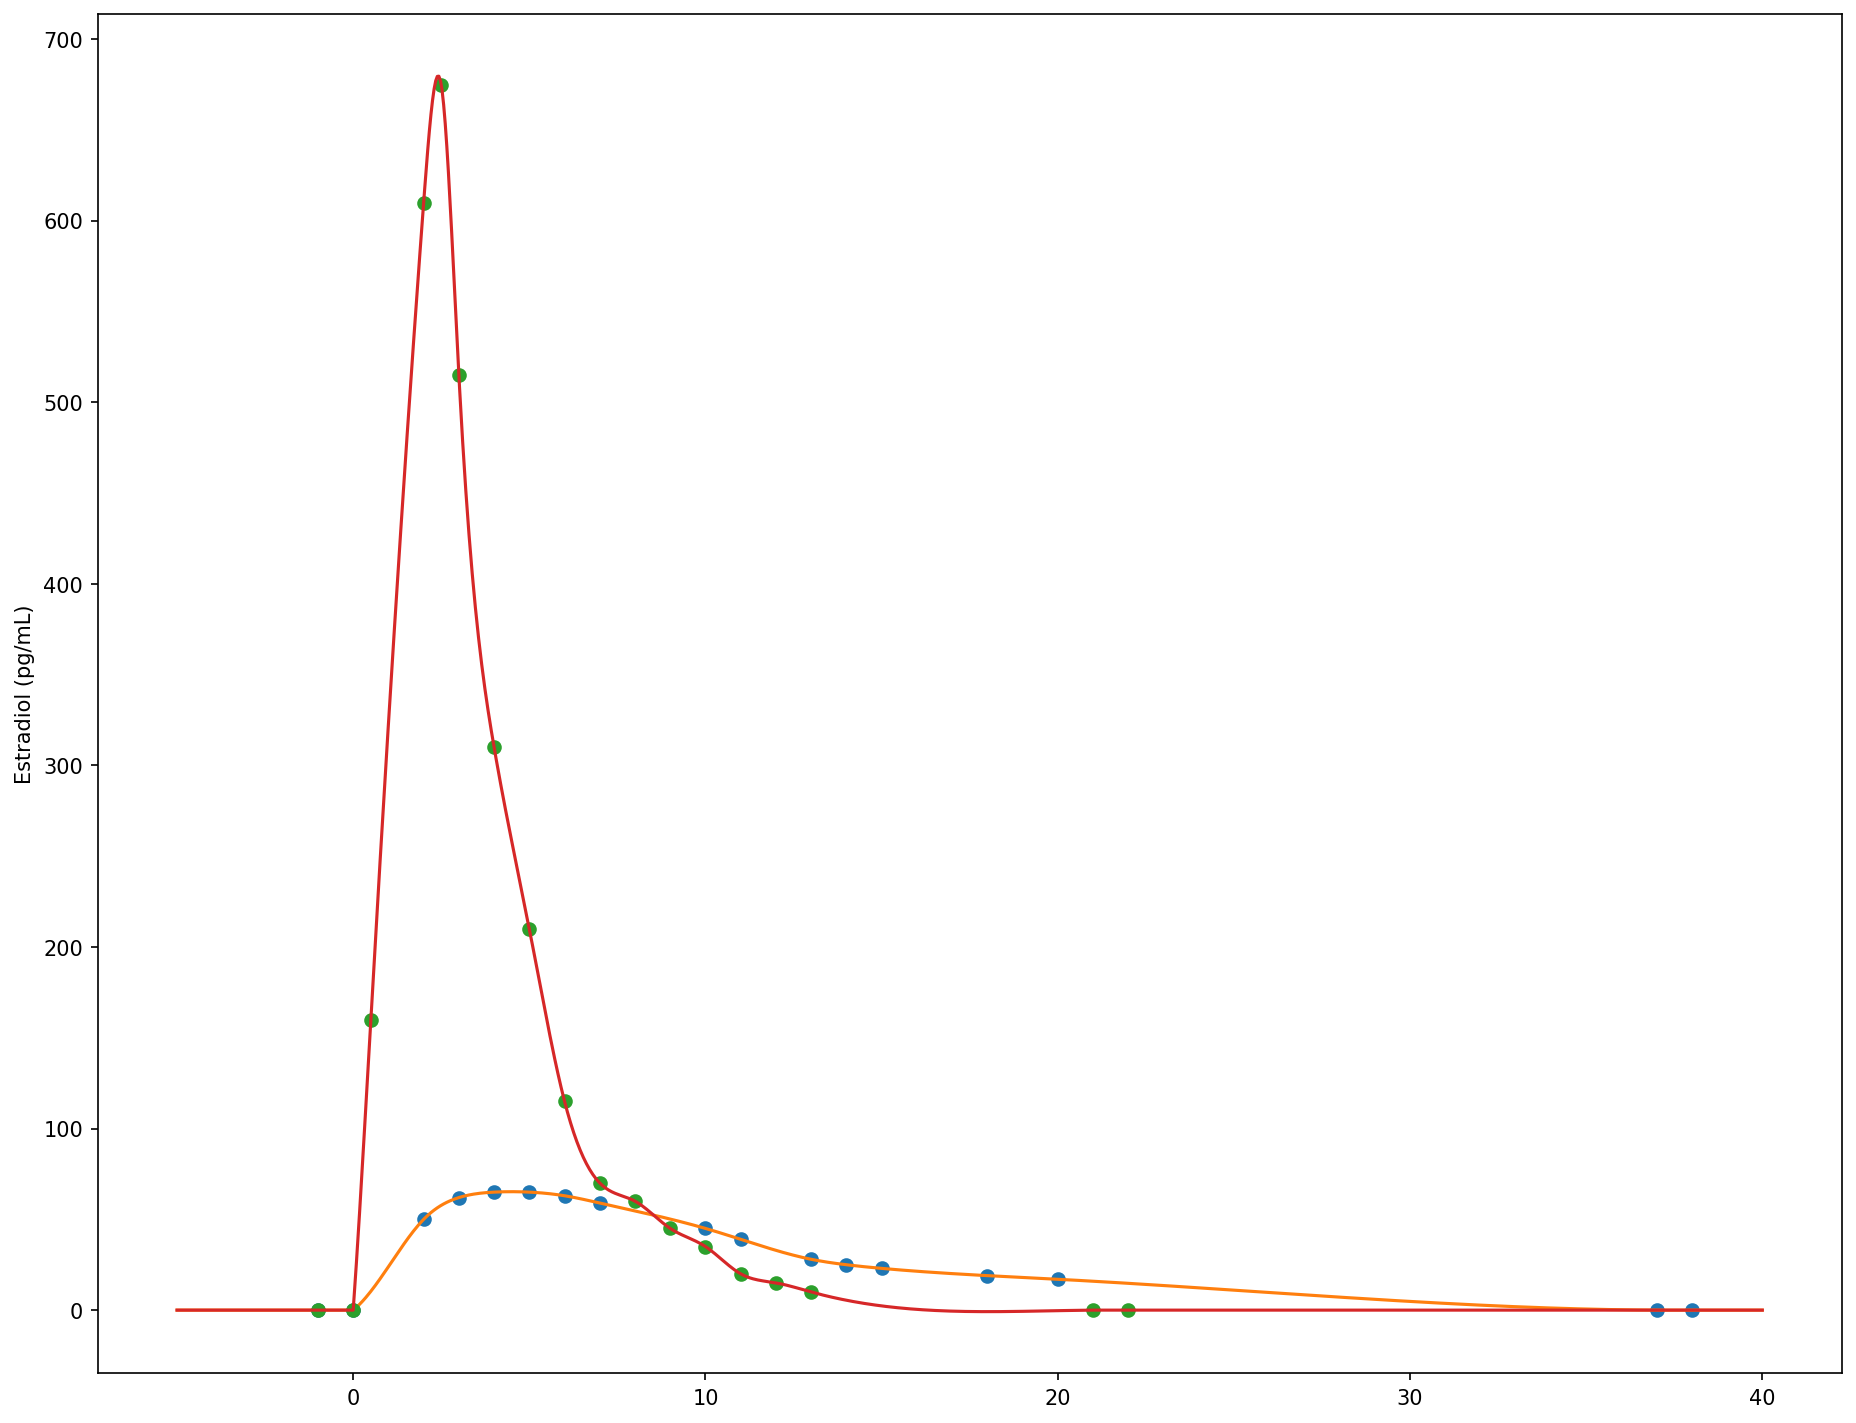

In [6]:
injectio.startPlot()
target_x = np.linspace(-5.0, 40.0, num=1000)
ec_1mg_y = np.array([injectables.ef_ec_1mg(T) for T in target_x])
ev_5mg_y = np.array([injectables.ef_ev_5mg(T) for T in target_x])

plt.plot(injectables.ec_level_1mg[:,0], injectables.ec_level_1mg[:,1], 'o')
plt.plot(target_x, ec_1mg_y)

plt.plot(injectables.ev_level_5mg[:,0], injectables.ev_level_5mg[:,1], 'o')
plt.plot(target_x, ev_5mg_y)

## Depot effects of injection frequencies

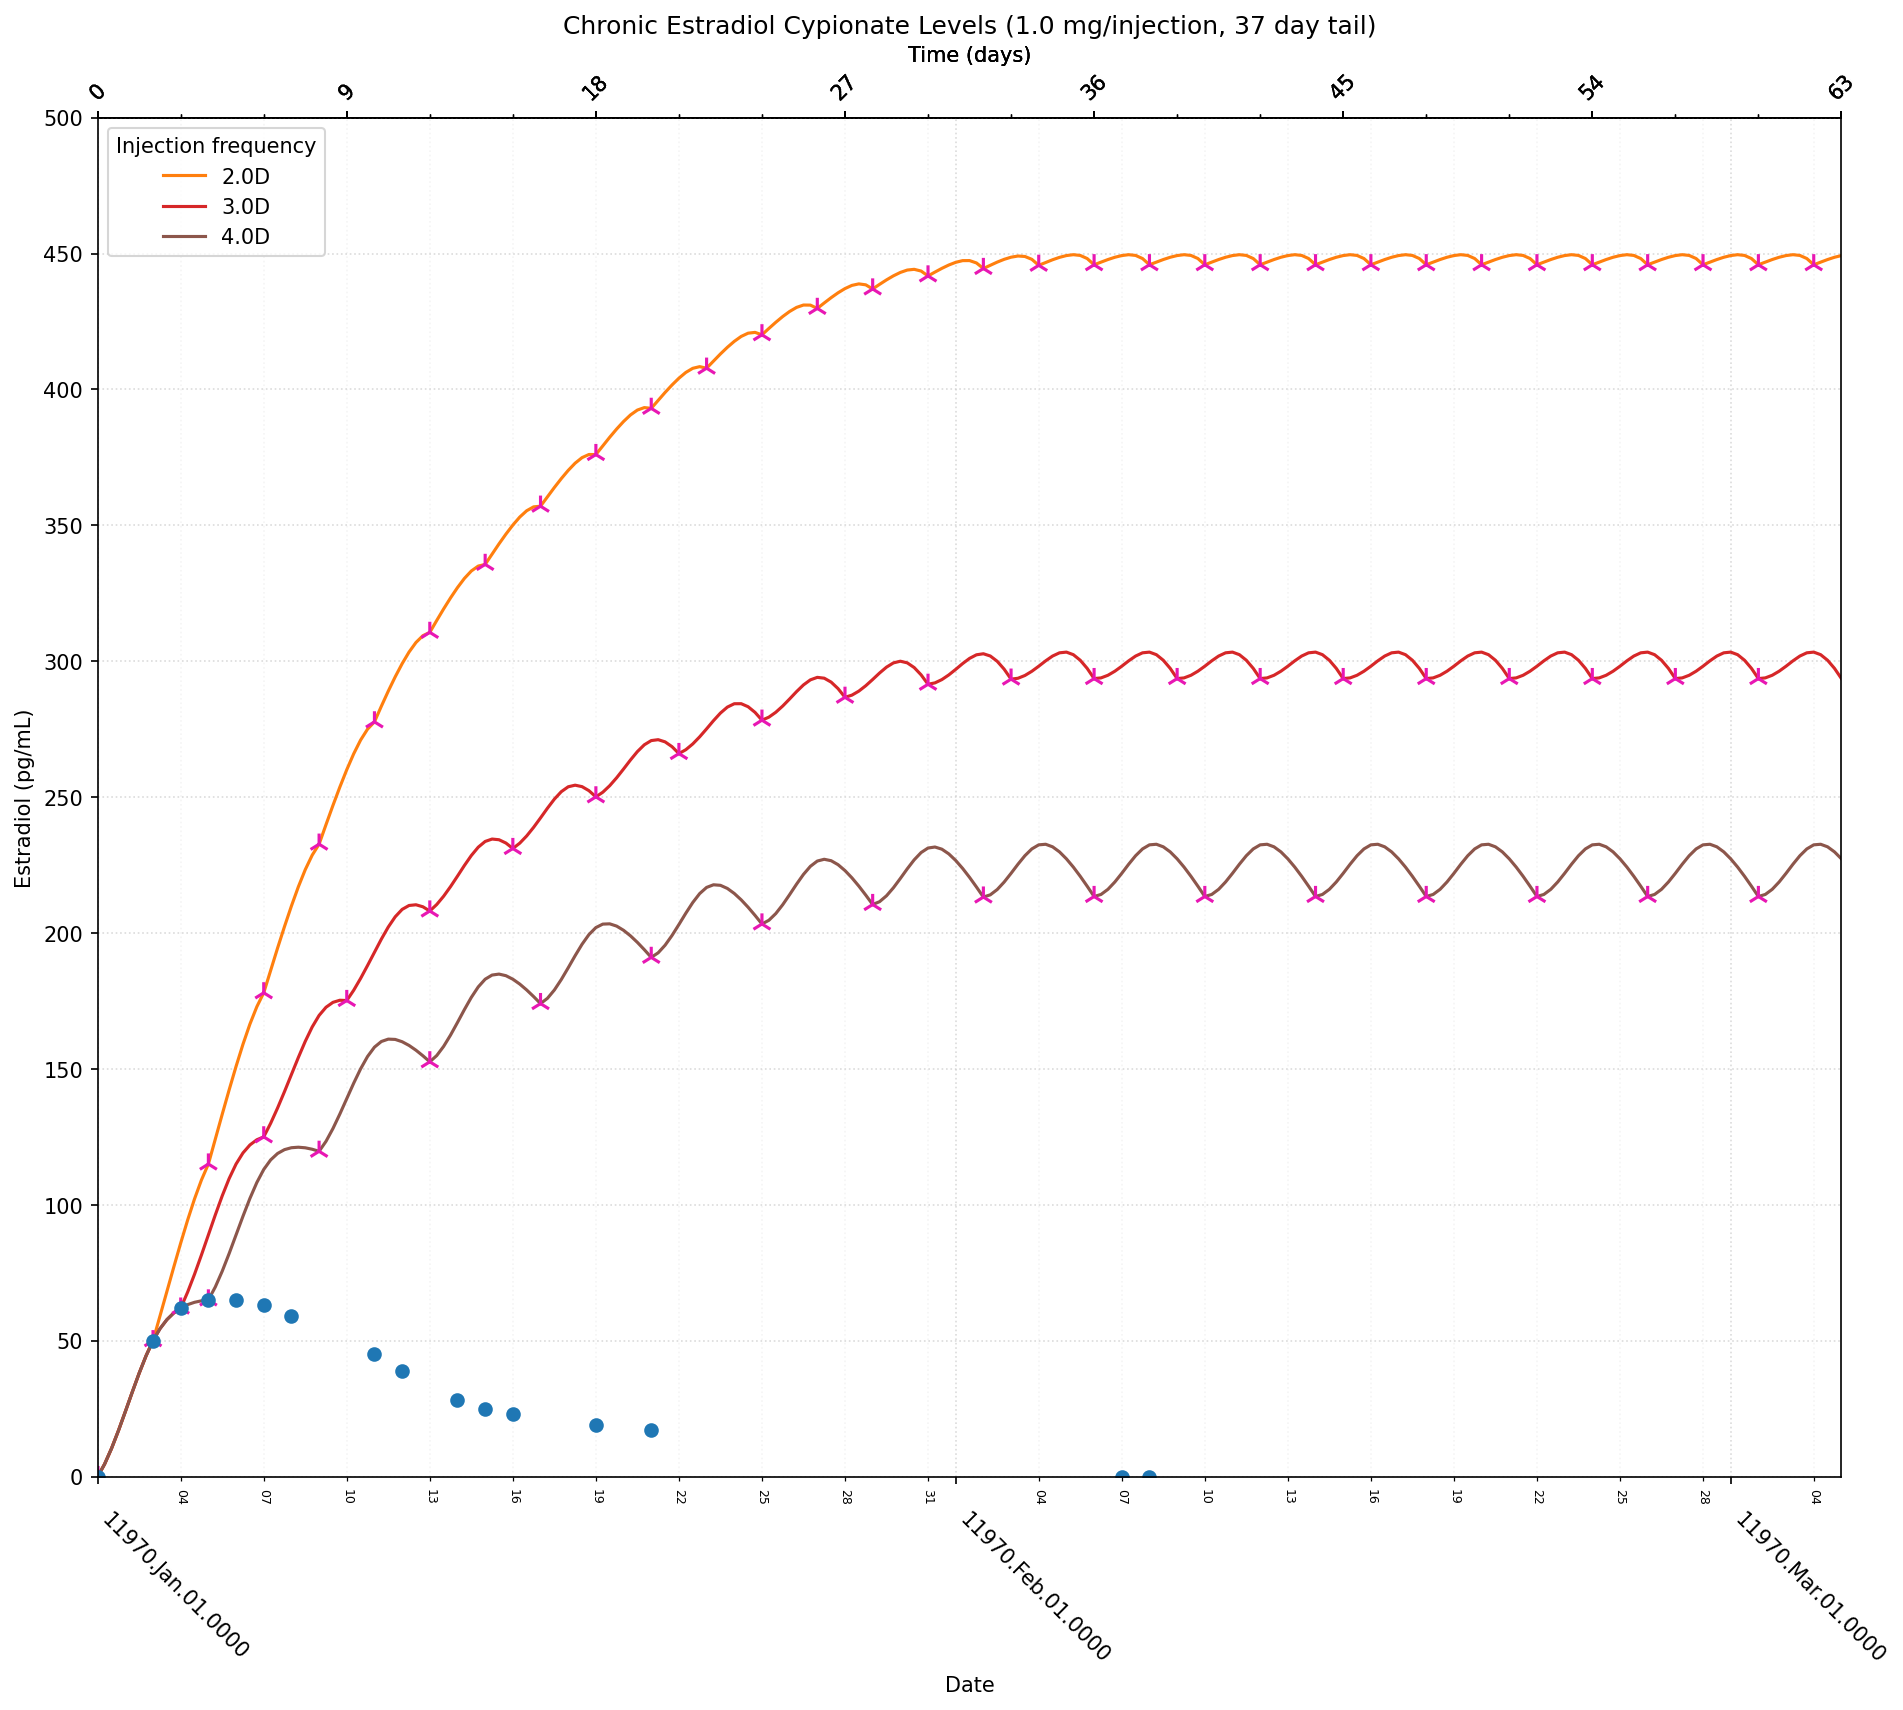

862.3055555555555
2139.514583333333
2388.2291666666665


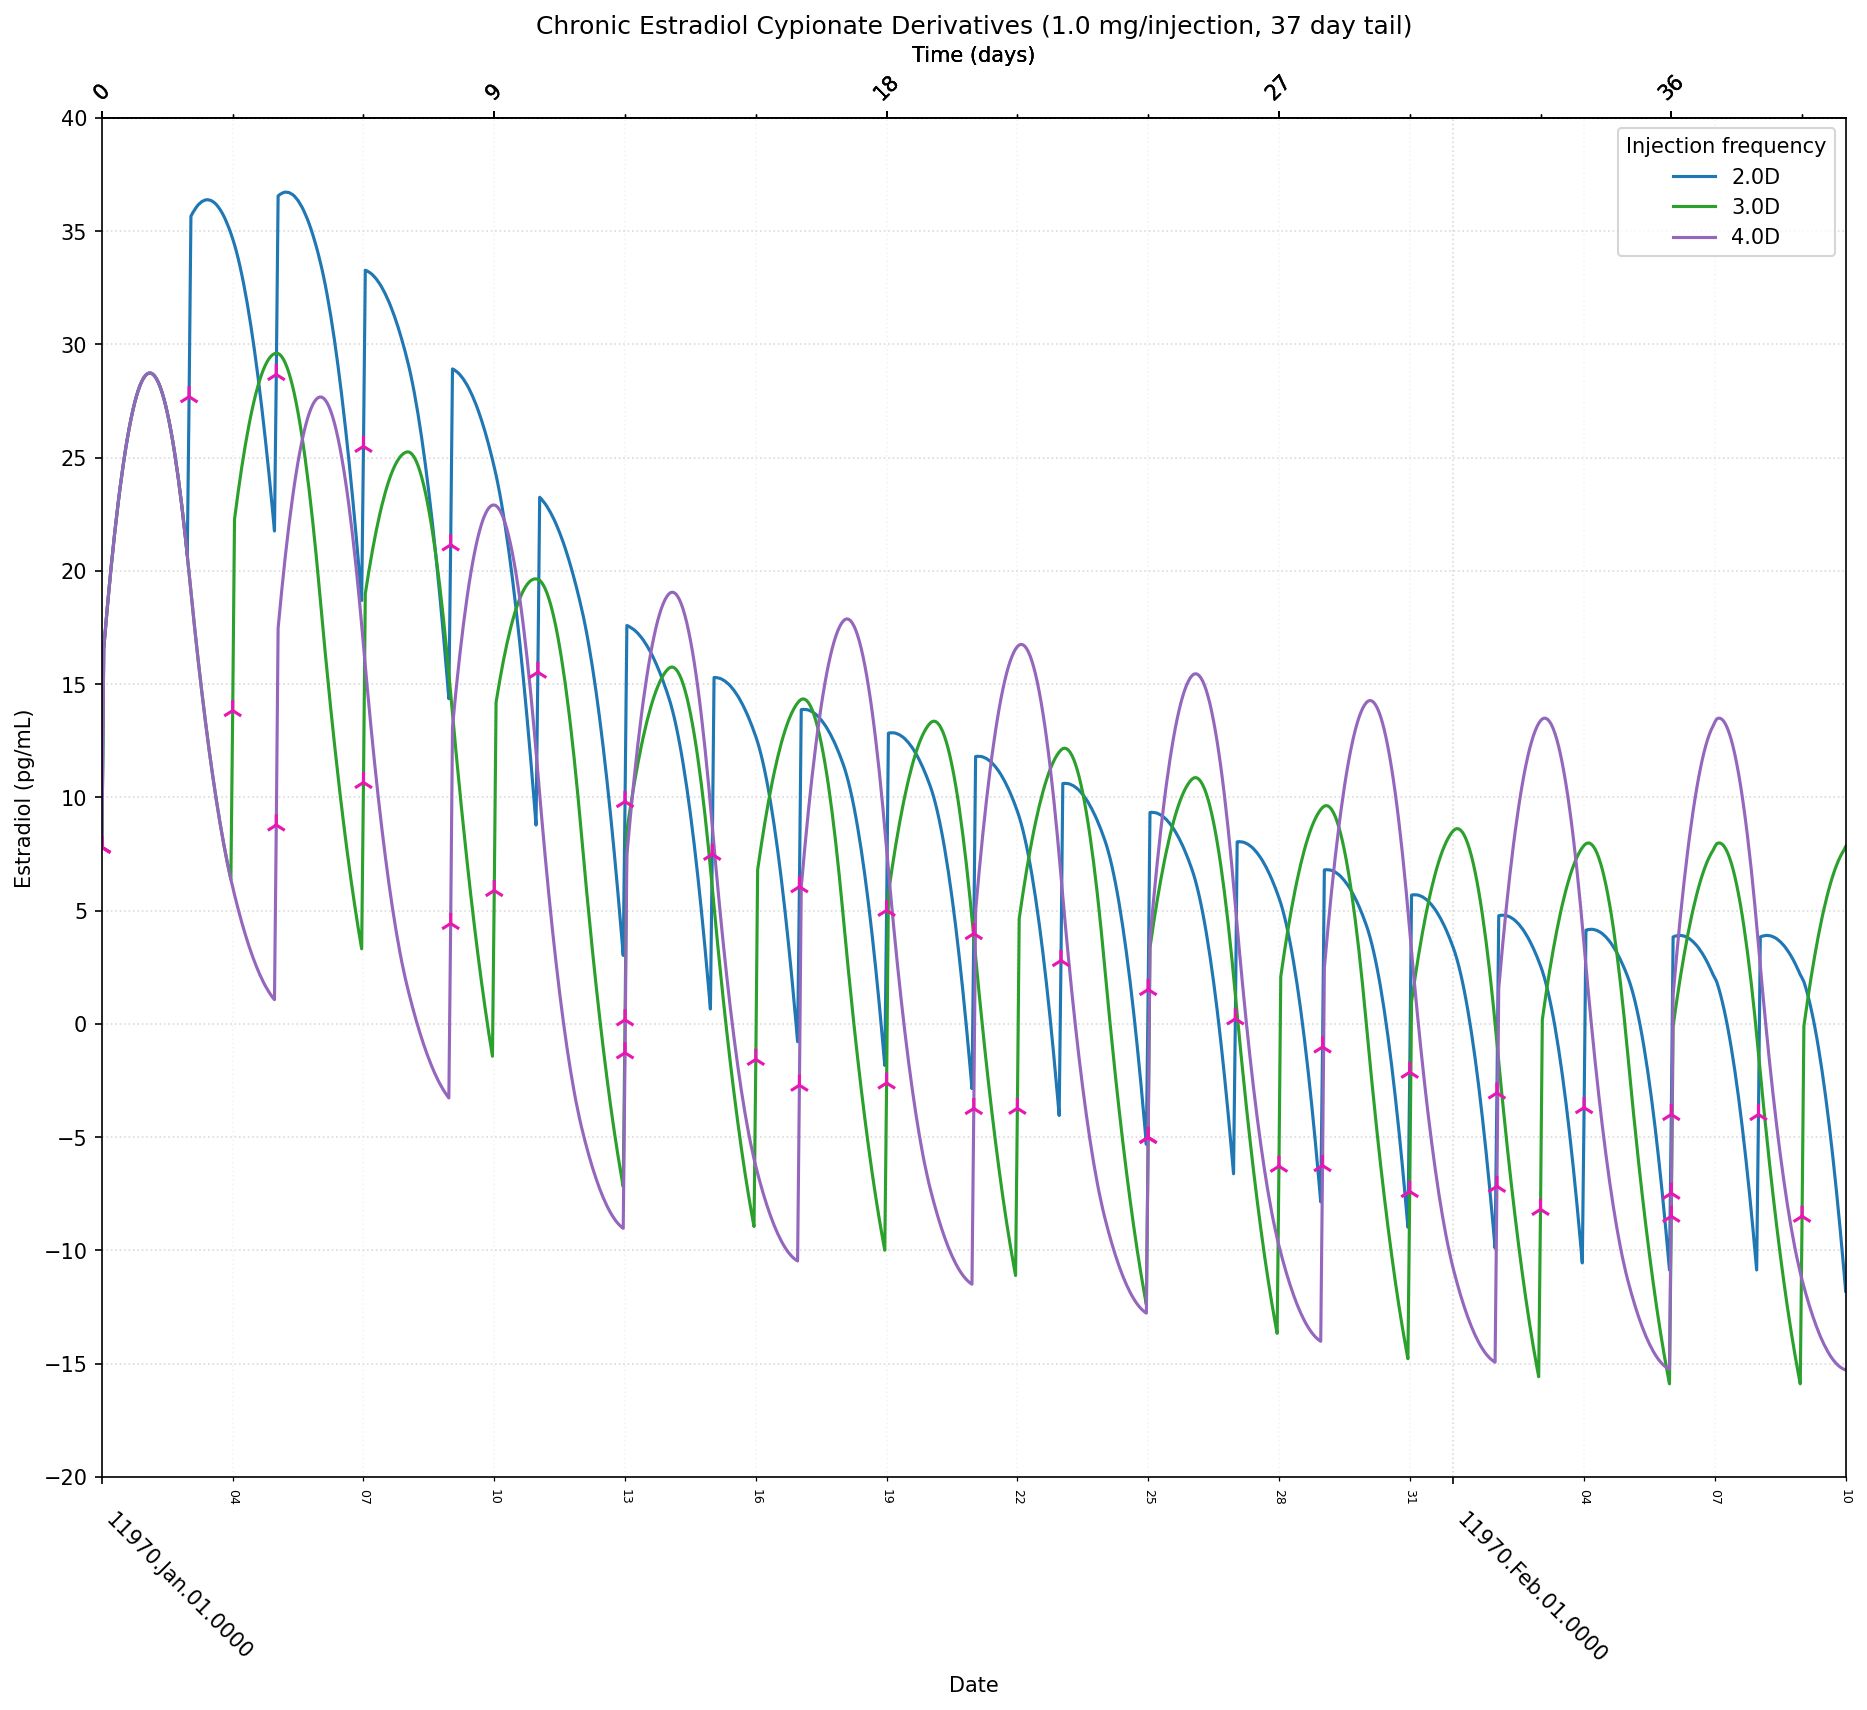

In [27]:
injectio.startPlot()
plt.title('Chronic Estradiol Cypionate Levels (1.0 mg/injection, 37 day tail)')
plt.ylim(bottom=0, top=500)
plt.yticks(range(0, 501, 50))
plt.plot(injectables.ec_level_1mg[:,0], injectables.ec_level_1mg[:,1], 'o')
injectio.plotInjectionFrequencies(
    injectables.ef_ec_1mg,
    sim_time=63.0,
    sim_freq='6H',
    inj_freqs=['2.0D', '3.0D', '4.0D'])

# Steady level ~= integral(inj_func) / inj_freq
from scipy.integrate import simps
print(simps(injectables.ec_level_1mg[:,1], x=injectables.ec_level_1mg[:,0]))
print(simps(injectables.ec_level_5mg[:,1], x=injectables.ec_level_5mg[:,0]))
print(simps(injectables.ev_level_5mg[:,1], x=injectables.ev_level_5mg[:,0]))

injectio.startPlot()
plt.title('Chronic Estradiol Cypionate Derivatives (1.0 mg/injection, 37 day tail)')
plt.ylim(bottom=-20, top=40)
plt.yticks(range(-20, 41, 5))
# The derivative of a sum is equal to the sum of the derivatives!
injectio.plotInjectionFrequencies(
    lambda T: derivative(injectables.ef_ec_1mg, T, dx=1e-6),
    sim_time=40.0,
    sim_freq='1H',
    inj_freqs=['2.0D', '3.0D', '4.0D'])

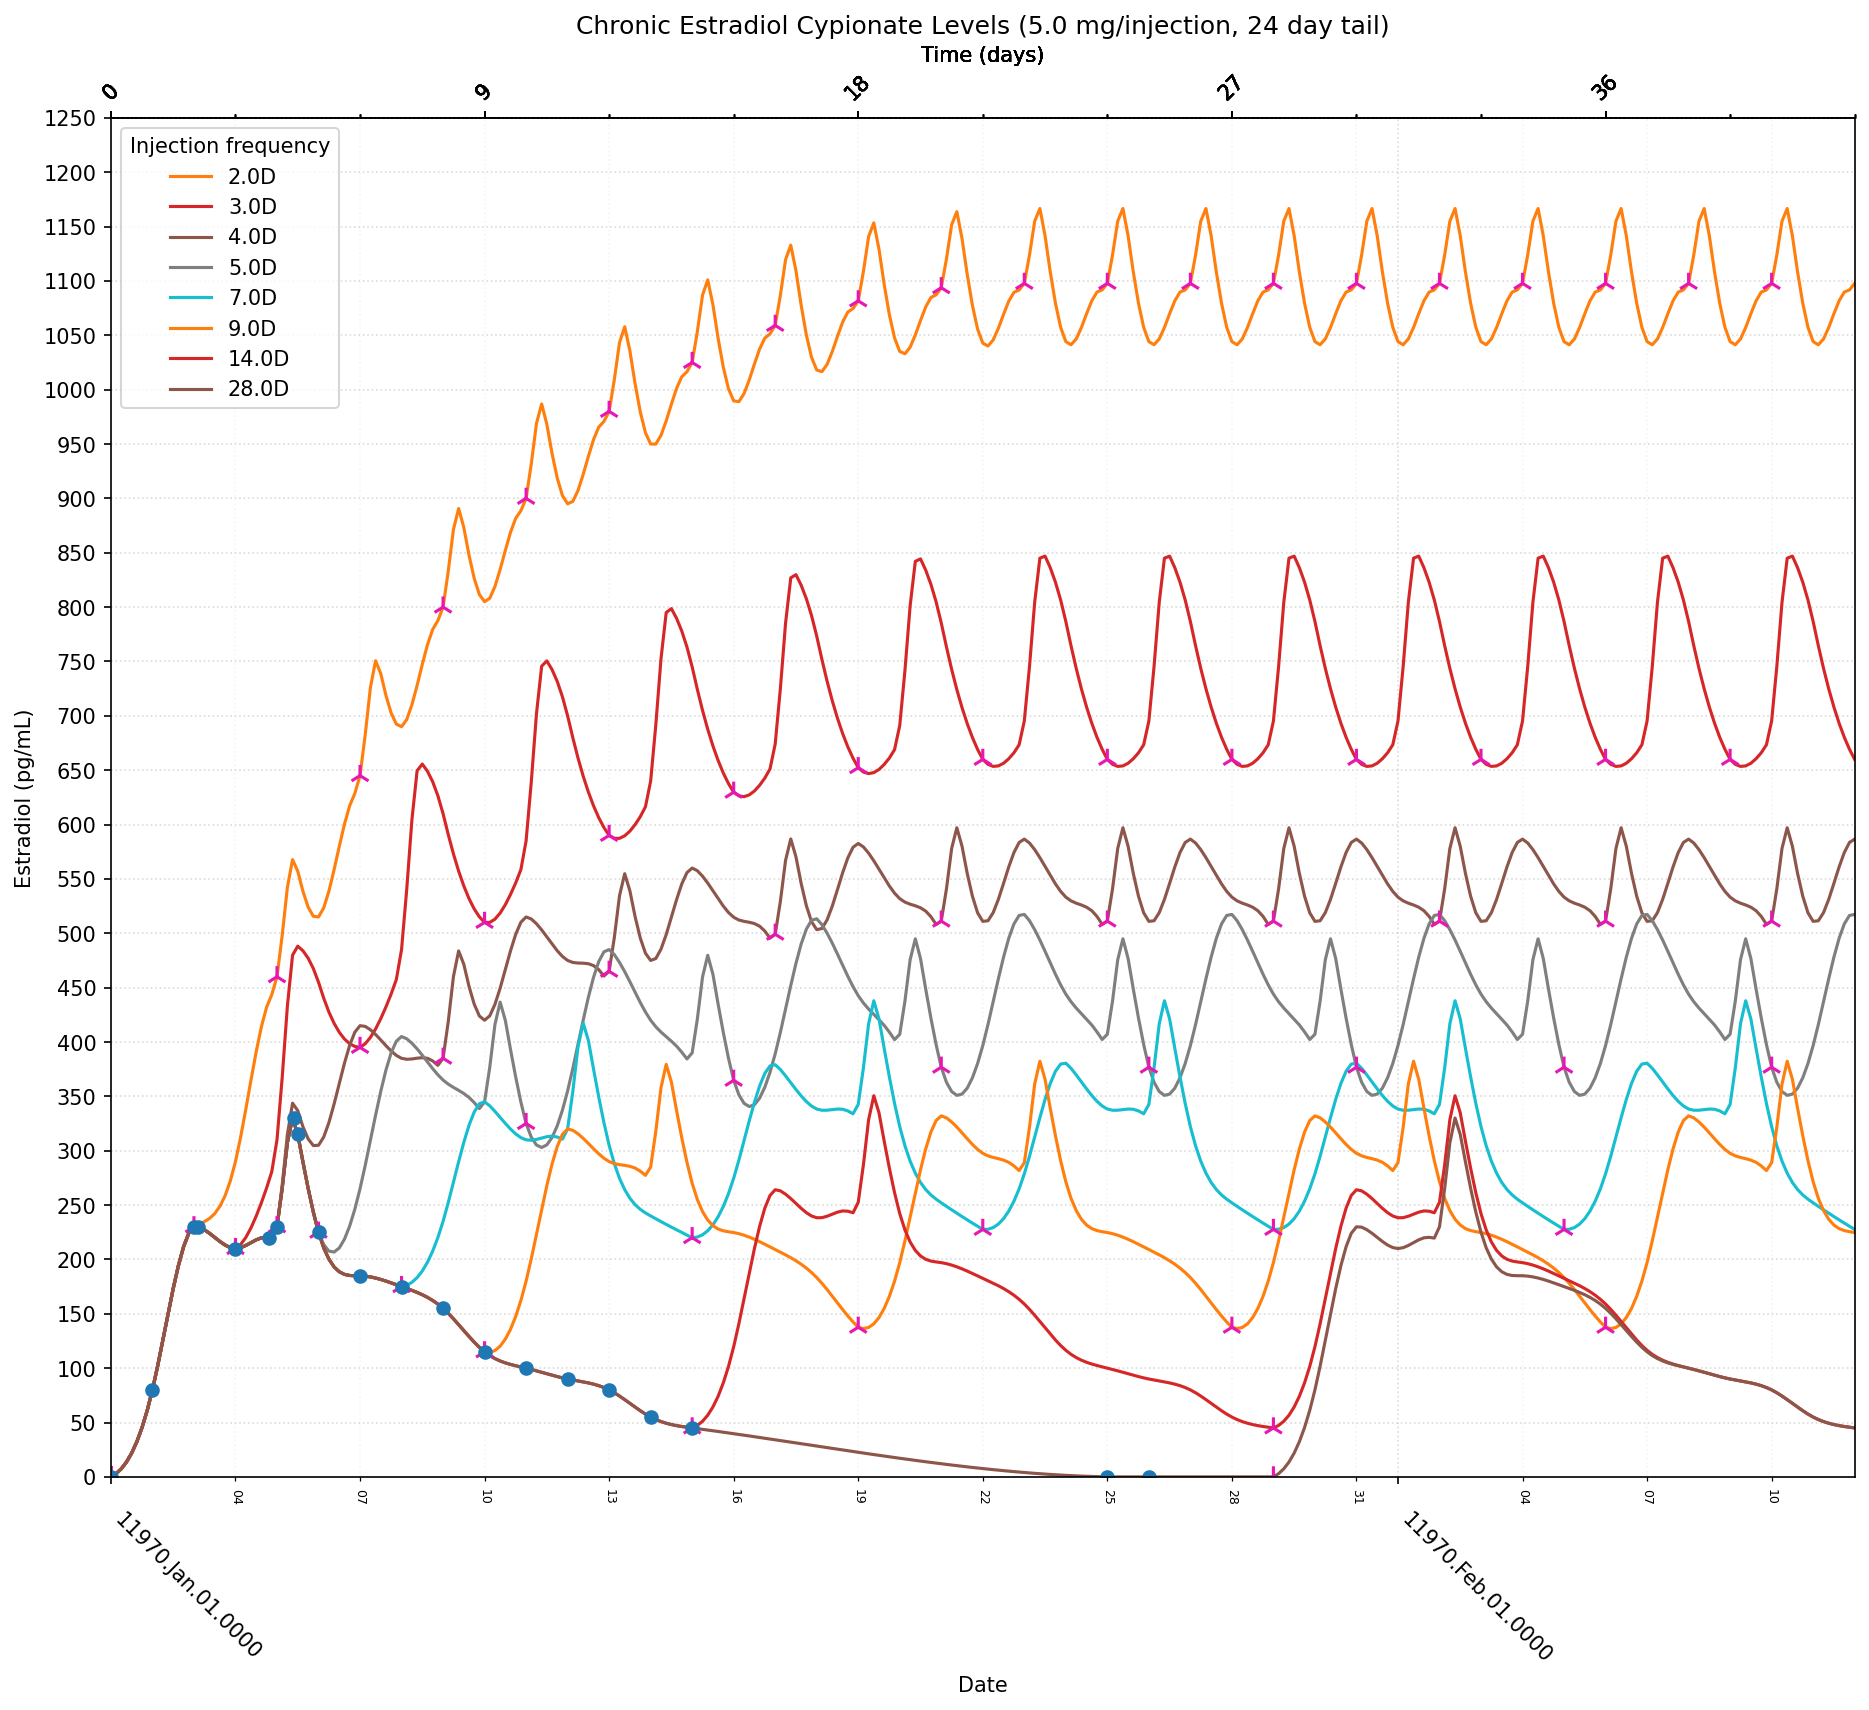

In [25]:
injectio.startPlot()
plt.title('Chronic Estradiol Cypionate Levels (5.0 mg/injection, 24 day tail)')
plt.ylim(bottom=0, top=1250)
plt.yticks(range(0, 1251, 50))
plt.plot(injectables.ec_level_5mg[:,0], injectables.ec_level_5mg[:,1], 'o')
injectio.plotInjectionFrequencies(
    injectables.ef_ec_5mg,
    sim_time=42.0,
    sim_freq='3H',
    inj_freqs=['2.0D', '3.0D', '4.0D', '5.0D', '7.0D', '9.0D', '14.0D', '28.0D'])

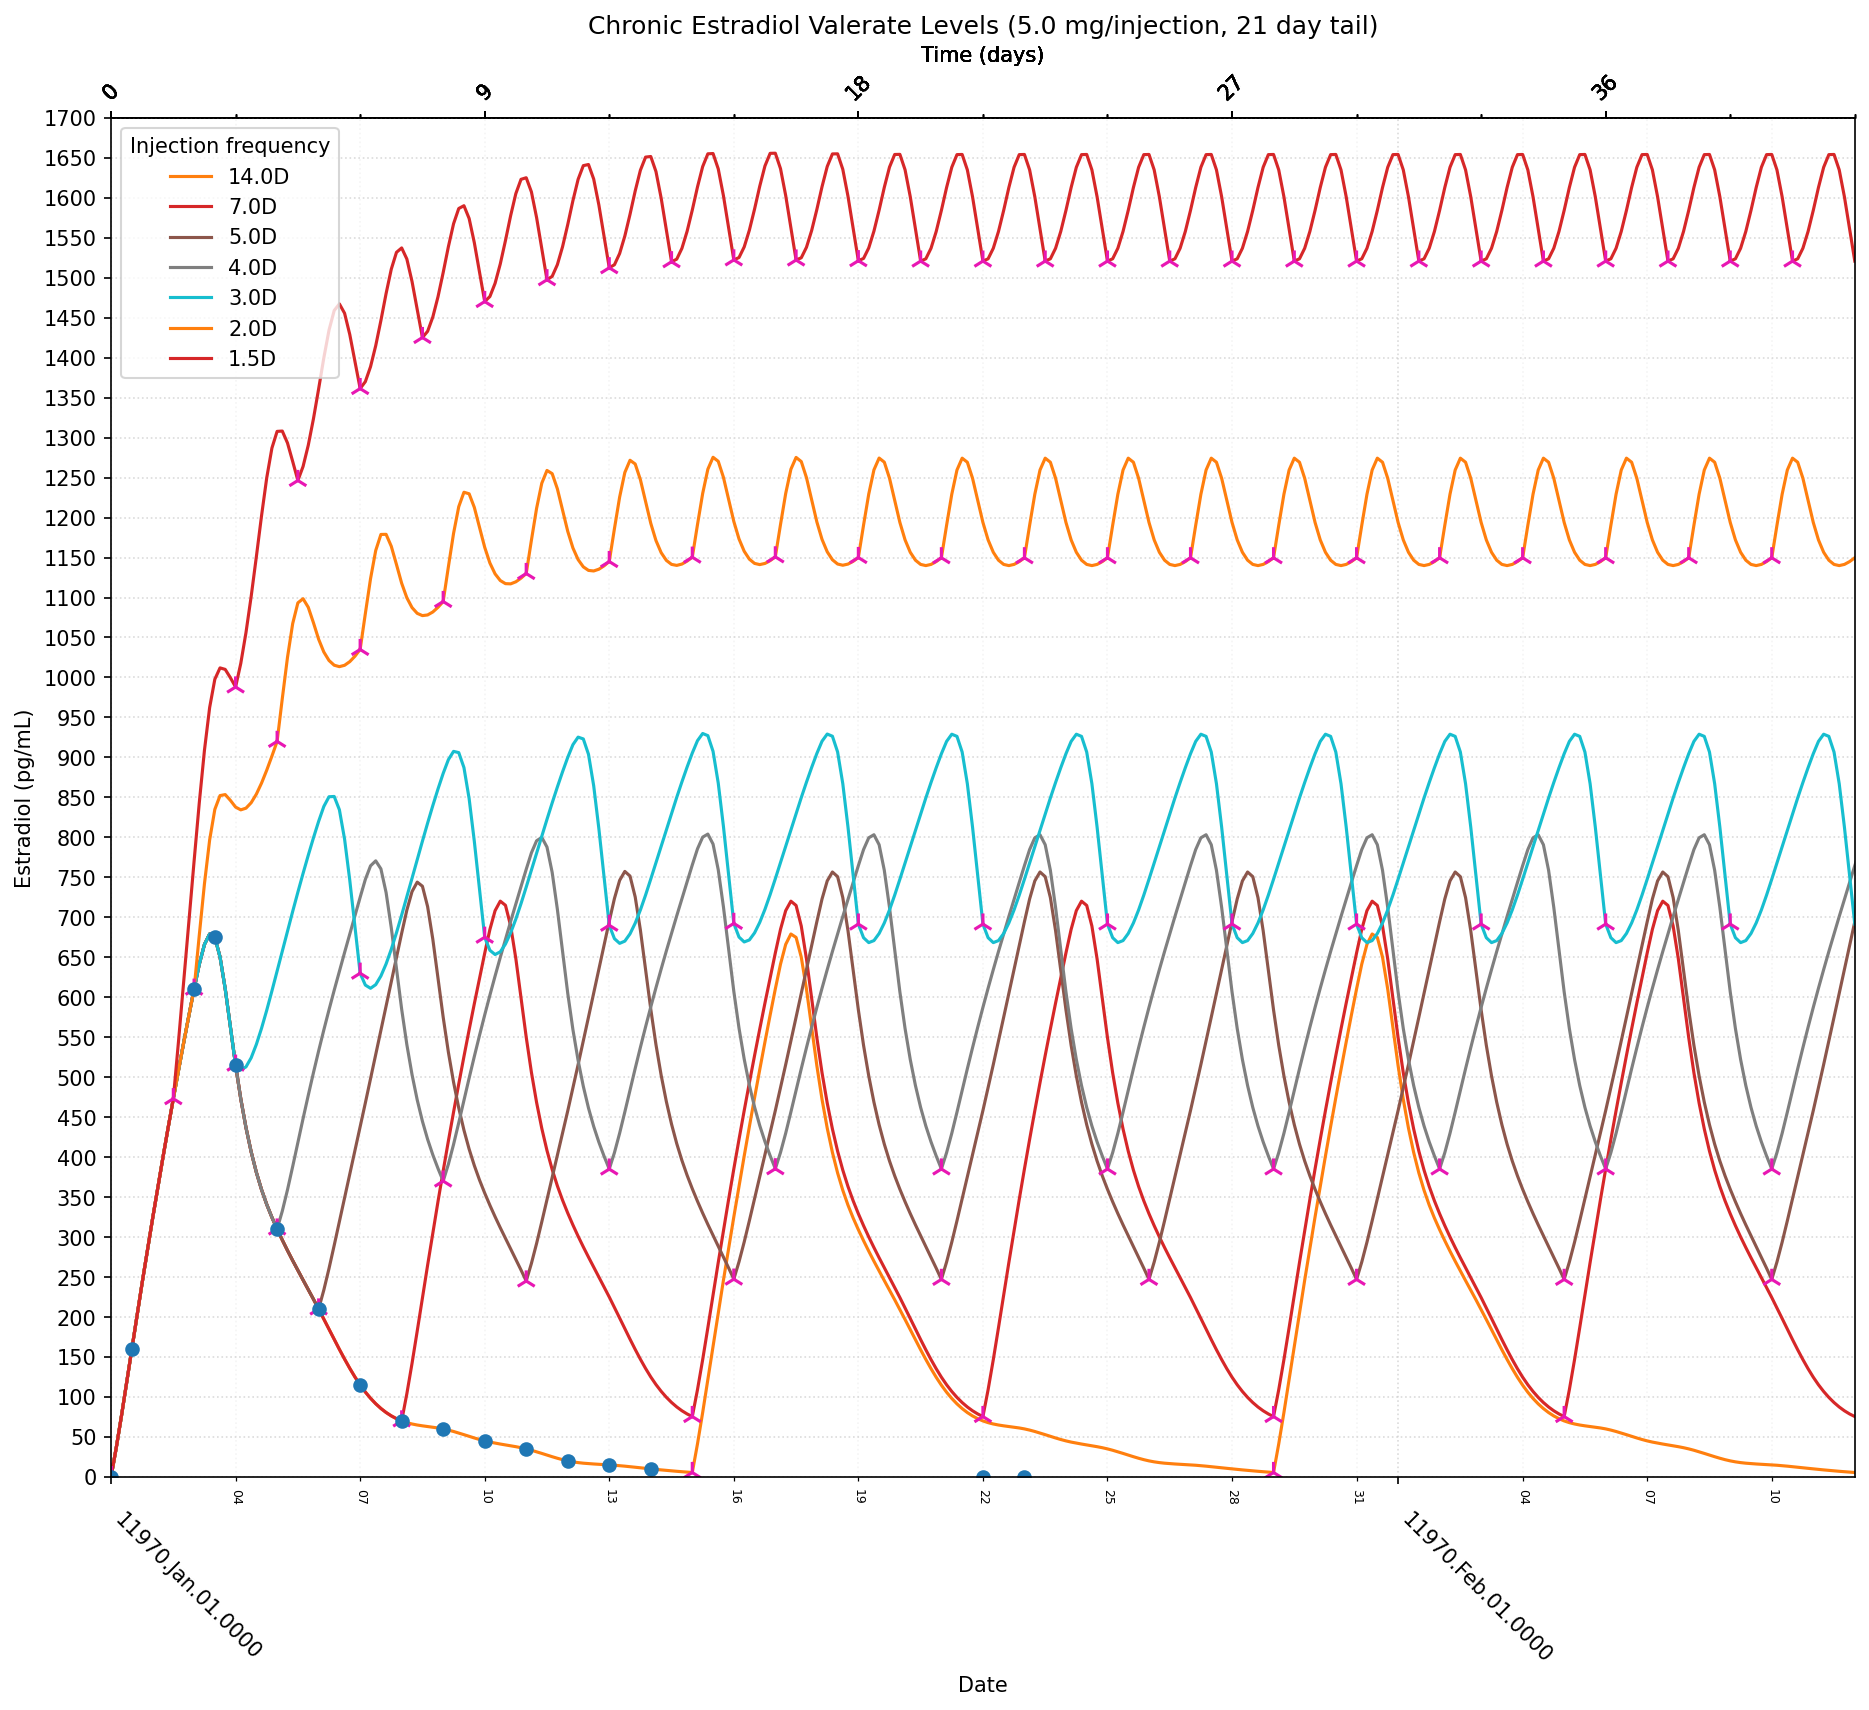

In [24]:
injectio.startPlot()
plt.title('Chronic Estradiol Valerate Levels (5.0 mg/injection, 21 day tail)')
plt.ylim(bottom=0, top=1700)
plt.yticks(range(0, 1701, 50))
plt.plot(injectables.ev_level_5mg[:,0], injectables.ev_level_5mg[:,1], 'o')
injectio.plotInjectionFrequencies(
    injectables.ef_ev_5mg,
    sim_time=42.0,
    sim_freq='3H',
    inj_freqs=['1.5D', '2.0D', '3.0D', '4.0D', '5.0D', '7.0D', '14.0D'][::-1])